In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples= 1000, n_features=2, n_informative=1,
                           n_redundant= 0, n_classes= 2, n_clusters_per_class= 1,
                           random_state= 41, hypercube= False, class_sep= 10)

In [2]:
import matplotlib.pyplot as plt

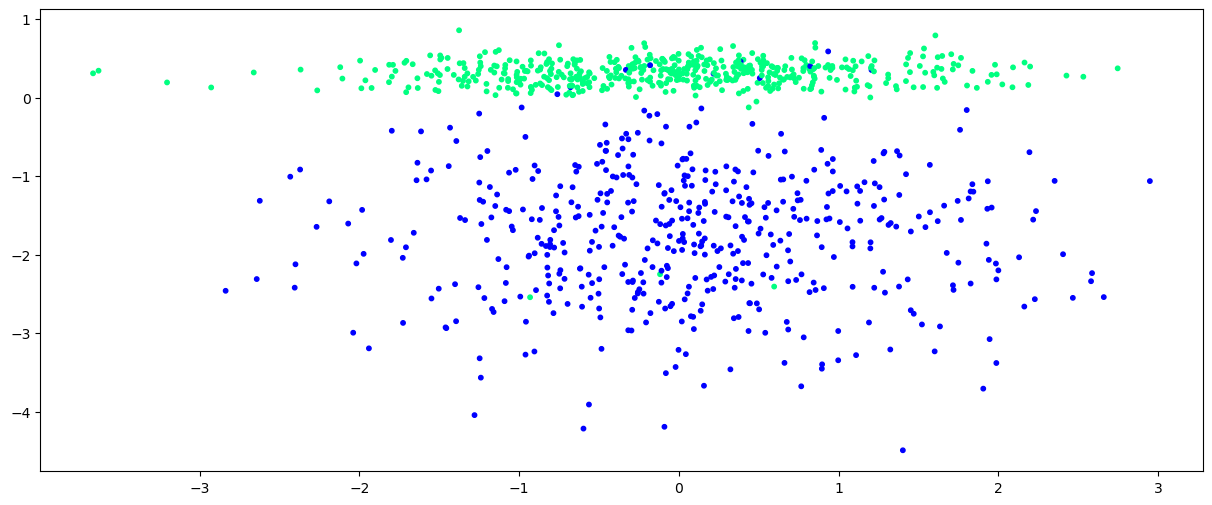

In [7]:
plt.figure(figsize=(15, 6))
plt.scatter(X[:, 0], X[:, 1],c= y, cmap= "winter", s= 10)

In [8]:
# function for making perceptron trick
def perceptron_trick(X, y):
    
    # inserting 1 at starting of X as bias 
    x = np.insert(X,0,1,axis= 1)
    
    # initializing weights
    weights = np.ones(x.shape[1])
    
    # learning rate
    lr = 0.1
    
    # applying for loop till 1000 epochs
    for i in range(1000):
        
        # randomly initallizing a datapoint from dataset
        j = np.random.randint(0,1000)
        
        # calculating the y_hat
        y_hat = step(np.dot(x[j], weights))
        
        # updating weights
        weights = weights + lr*(y[j] - y_hat)*x[j]
        
    # returning weights[0] as intercept and weights[1:] as coefficients
    return weights[0], weights[1:]
# function for step function
def step(Z):
    return 1 if Z>0 else 0



In [9]:
intercept_, coef_ = perceptron_trick(X,y)

In [10]:
print(intercept_)
print(coef_)

1.3877787807814457e-16
[0.0543339 0.4614701]


In [11]:
m = -(coef_[0]/ coef_[1])
b = -(intercept_/coef_[1])

In [13]:
x_input = np.linspace(-3,3,1000)
y_input = m*x_input + b

(-3.0, 2.0)

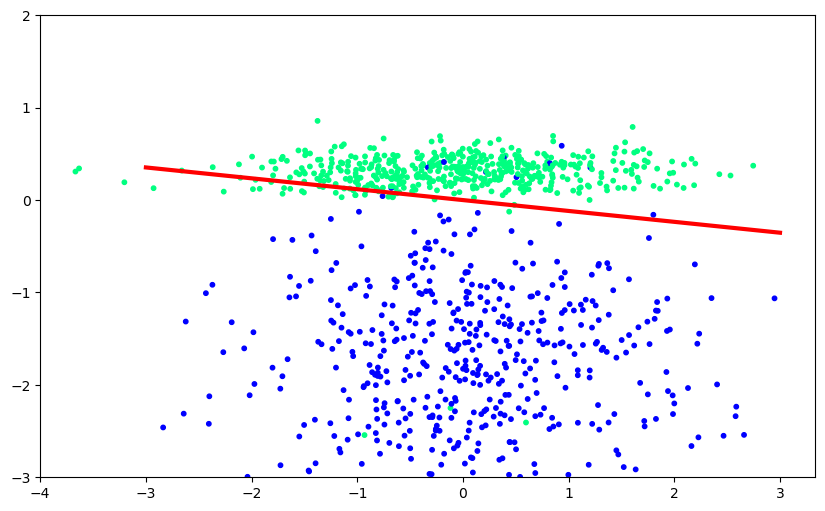

In [15]:

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=10)
plt.ylim(-3,2)


In [16]:
from sklearn.linear_model import Perceptron
p = Perceptron()
p.fit(X,y)


Perceptron()

In [20]:
p.coef_

array([[0.02060363, 3.77499209]])

In [21]:
p.intercept_

array([0.])

<Axes: >

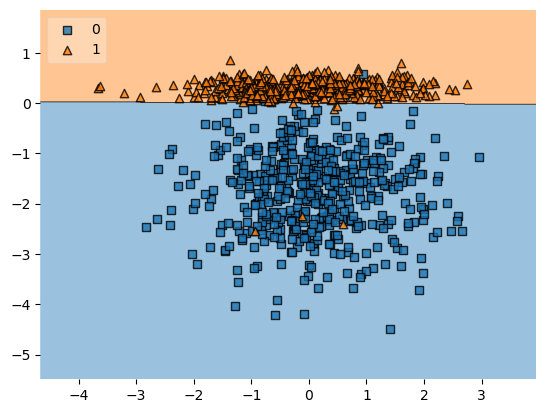

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y, clf= p, legend= 2)